# 0. AB Testing and Analysis for MSU

For this AB Testing project, we are observing which headline will generate the most engagement:
* Interact (index.php)
* Connect (index2.php)
* Learn (index3.php)
* Help (index4.php)
* Services (index5.php)



Publication Associated:
https://quod.lib.umich.edu/w/weave/12535642.0001.101?view=text;rgn=main

In [5]:
# Dependencies
import pandas as pd
import numpy as np
import regex as re

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Part 1. Exploratory Analysis
* What is the median average time on the page?
* What is the average total page views?
* Identify outliers in the dataset

## Assumptions
`NaN` is a 404 page not found.
`Avg. Time on Page` is in seconds.
`Page Value` does not contribute any meaningful information in this analysis.
Page label '/' is `index.php`.


In [6]:
# Import analytics dataset
df_page_views = pd.read_excel('GoogleAnalytics/MSU-Library-Pages-20130529-20130618.xlsx', 'Dataset1')
df_total_page_views = pd.read_excel('GoogleAnalytics/MSU-Library-Pages-20130529-20130618.xlsx', 'Dataset2')

In [7]:
df_total_page_views

,Day Index,Pageviews
0,2013-05-29,3115
1,2013-05-30,2999
2,2013-05-31,2573
3,2013-06-01,1372
4,2013-06-02,1722
5,2013-06-03,2687
6,2013-06-04,2949
7,2013-06-05,2937
8,2013-06-06,2324
9,2013-06-07,1916


In [8]:
# Preview data
df_page_views

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/find/,3893,2901,51.994161,167,0.449102,0.164141,0
1,/resources/,2864,2157,27.411125,172,0.255814,0.133729,0
2,/index5.php,2284,1806,73.939034,1759,0.486072,0.447023,0
3,/index3.php,2213,1727,74.000000,1663,0.467829,0.430637,0
4,/index4.php,2210,1701,98.770559,1657,0.499095,0.449774,0
5,/,2206,1750,57.835434,1694,0.420897,0.388486,0
6,/index2.php,2099,1618,69.400000,1583,0.456096,0.414007,0
7,/resources/title.php,1514,1207,264.772031,84,0.809524,0.655218,0
8,/resources/about.php?id=120&title=Montana+Code...,1208,968,207.732794,968,0.820248,0.795530,0
9,/journals/,1166,937,269.485981,185,0.735135,0.632933,0


In [9]:
# Capture metrics of interest
median_time_on_page = np.median(df_page_views['Avg. Time on Page'])
average_page_views = np.mean(df_page_views['Pageviews'])

print(f"The median average time spent on each page is {round(median_time_on_page, 2)} seconds.")
print(f"The average page view is {round(average_page_views,2)} views.")

The median average time spent on each page is 55.67 seconds.
The average page view is 1518.78 views.


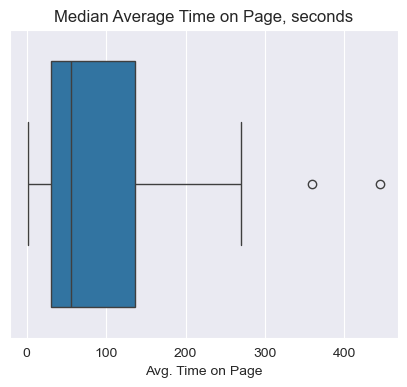

<Figure size 640x480 with 0 Axes>

In [10]:
# Plot median times
fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.boxplot(data=df_page_views, x='Avg. Time on Page', ax=ax)
ax.set_title("Median Average Time on Page, seconds")
fig.savefig("median_avg_time.png")
plt.show()
plt.clf()

In [11]:
# Maximum values
df_page_views_sorted = df_page_views.sort_values(by=['Avg. Time on Page'], axis=0, inplace=False, ascending=False)
df_page_views_sorted.head(2)

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
43,/range-science/item/1434,90,79,444.818182,79,0.860759,0.877778,0
30,/guides/mla6.php,145,126,359.250000,126,0.849206,0.834483,0


# Conclusions
There are two outlier values for `Avg. Time on Page`:
* `/range-science/item/1434`
* `/guides/mla6.php`

Both of these pages have extreme outlier values that falls outside the 25 and 75 IQR range.

# Part 2: Analysis of Testing Results
* Explore the dataset
* Create a visual representation of the CTR, bounce rate, and exit rate for all five variations of the AB test.
    * CTR = clicks / impressions
    * BR = page visit/ total visits
    * ER = total exits/ total visits
* Write a short summary explaining why you chose the visualizations you did and be sure to include what variation you would recommend to our team based on your findings.


In [12]:
# Import CrazyEgg Data
file_paths = {
    "interact": 'CrazyEgg/Homepage Version 1 - Interact, 5-29-2013/Element list Homepage Version 1 - Interact, 5-29-2013.csv',
    "connect": 'CrazyEgg/Homepage Version 2 - Connect, 5-29-2013/Element list Homepage Version 2 - Connect, 5-29-2013.csv',
    "learn":'CrazyEgg/Homepage Version 3 - Learn, 5-29-2013/Element list Homepage Version 3 - Learn, 5-29-2013.csv',
    "help":'CrazyEgg/Homepage Version 4 - Help, 5-29-2013/Element list Homepage Version 4 - Help, 5-29-2013.csv',
    "services":'CrazyEgg/Homepage Version 5 - Services, 5-29-2013/Element list Homepage Version 5 - Services, 5-29-2013.csv'
}

# Dataframe dictionary
all_versions_dataframes_dict = dict()

# Read in dataframes from directory
for k,v in file_paths.items():
    all_versions_dataframes_dict[k] = pd.read_csv(v)
    
# Preview
all_versions_dataframes_dict['services']

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,69,a,FIND,397,True,Homepage Version 5 - Services • http://www...
1,61,input,s.q,323,True,created 5-29-2013 • 20 days 4 hours 59 min...
2,67,a,lib.montana.edu/find/,106,True,NaN
3,62,button,Search,85,True,NaN
4,98,a,Hours,81,True,NaN
5,78,a,REQUEST,57,True,NaN
6,129,area,Montana State University - Home,49,False,NaN
7,87,a,SERVICES,45,True,NaN
8,96,a,News,24,True,NaN
9,76,a,lib.montana.edu/request/,22,True,NaN


In [13]:
# Calculate CTR for each version using CrazyEgg Data
ctr_dict = pd.DataFrame(columns=all_versions_dataframes_dict['services'].columns)

for k, v in all_versions_dataframes_dict.items():
    # Extract impressions from pdfs
    regex_pattern = re.compile(r'(\d+) visits')
    page_stats = v.iat[1,5]
    match = regex_pattern.search(page_stats)
    total_impressions = int(match.group(1))
    v['CTR'] = v['No. clicks']/total_impressions
    
    # Store values in empty dataframe
    ctr_dict = pd.concat([ctr_dict, v[v['Name'] == k.upper()]], axis=0, ignore_index=True)

ctr_dict = ctr_dict.sort_values(by='CTR')
ctr_dict

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,CTR
0,87,a,INTERACT,42,True,NaN,0.004084
2,87,a,LEARN,21,True,NaN,0.007645
3,92,a,HELP,38,True,NaN,0.011950
1,92,a,CONNECT,53,True,NaN,0.019329
4,87,a,SERVICES,45,True,NaN,0.021802


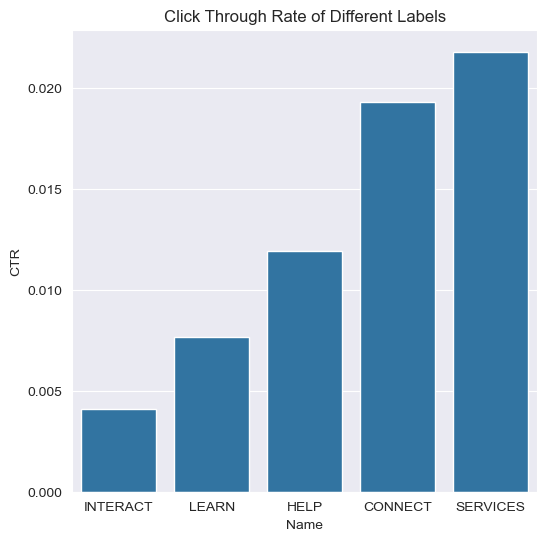

In [14]:
# Plot CTR of all versions from CrazyEgg
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.barplot(data=ctr_dict, x='Name', y='CTR', ax=ax)
ax.set_title('Click Through Rate of Different Labels')
fig.savefig("ctr_labels.png")
fig.show()

In [15]:
# CTR Across all 3 Cards
card_labels = ['FIND', 'REQUEST', 'SERVICES', 'CONNECT', 'HELP', 'LEARN', 'INTERACT']
agg_dict = dict()

# Map Names if not in card_labels
for k, v in all_versions_dataframes_dict.items():
    v['Name'] = v['Name'].apply(lambda x: x if x in card_labels else "Other")
    agg_dict[k] = v.groupby('Name').agg({"No. clicks": "sum",
                               "CTR": "sum"}).reset_index()
    

In [16]:
agg_dict['services']

,Name,No. clicks,CTR
0,FIND,397,0.192345
1,Other,849,0.411337
2,REQUEST,57,0.027616
3,SERVICES,45,0.021802


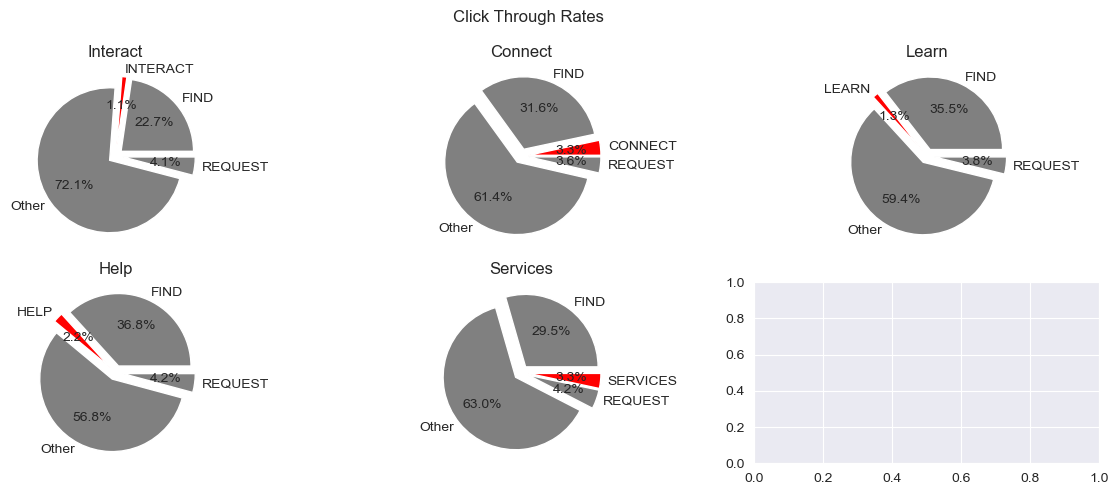

In [17]:
# Plot as pie graph
colormap = {
    'Other': 'gray',
    'FIND': 'gray',
    'REQUEST': 'gray',
}

fig, ax = plt.subplots(2,3, figsize=(12,5))
for axes, (key, value) in zip(ax.flatten(), agg_dict.items()):
    axes.pie(value['CTR'], 
             labels=value['Name'], 
             autopct='%1.1f%%', 
             explode=[0.1] * len(value['CTR']), 
             colors=[colormap.get(name, 'red') for name in value['Name']]
             ) 
    axes.set_title(key.title())
fig.suptitle("Click Through Rates")
fig.tight_layout()
fig.savefig("ctr_visualized_pie.png")

In [18]:
# Visualize Bounce and Exit Rates, pulled from Google Analytics
page_map = {
    '/': 'INTERACT',
    '/index2.php': 'CONNECT',
    '/index3.php': 'LEARN',
    '/index4.php': 'HELP',
    '/index5.php': 'SERVICES'
}

# Filter dataframe to only pages of interest
filtered_df = df_page_views[df_page_views['Page'].isin([key for key in page_map.keys()])]

# Map Page to page name for clarity
filtered_df['Page'] = filtered_df['Page'].apply(lambda x: page_map[x] if x in page_map.keys() else 'Other')

# Normalize for visualization
interact_bounce_rate = filtered_df.loc[filtered_df['Page'] == 'INTERACT', 'Bounce Rate'].values
filtered_df['Bounce Rate'] = (filtered_df['Bounce Rate'] - interact_bounce_rate) * 100

interact_exit_rate = filtered_df.loc[filtered_df['Page'] == 'INTERACT', '% Exit'].values
filtered_df['% Exit'] = (filtered_df['% Exit'] - interact_exit_rate) * 100

# Preview 
filtered_df

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
2,SERVICES,2284,1806,73.939034,1759,6.517435,5.853682,0
3,LEARN,2213,1727,74.000000,1663,4.693194,4.215120,0
4,HELP,2210,1701,98.770559,1657,7.819747,6.128781,0
5,INTERACT,2206,1750,57.835434,1694,0.000000,0.000000,0
6,CONNECT,2099,1618,69.400000,1583,3.519874,2.552072,0


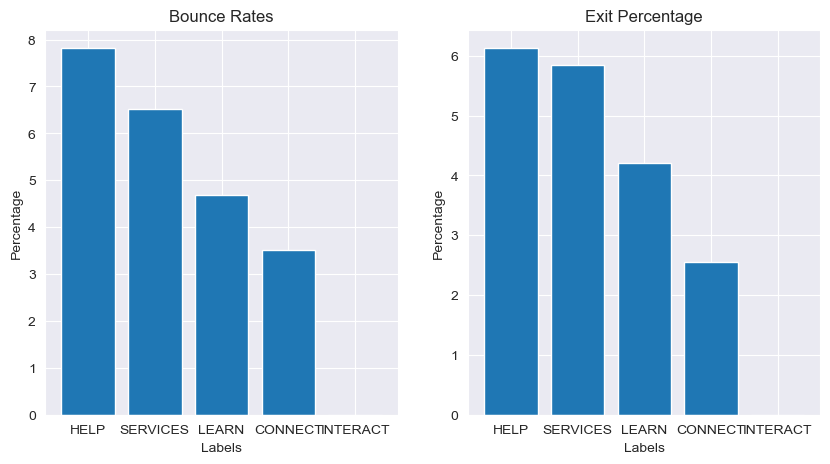

In [19]:
# Plot exit and bounce rates
fig, ax = plt.subplots(1,2, figsize=(10,5))
filtered_df.sort_values(by='Bounce Rate', ascending=False, inplace=True)
ax[0].bar(height=filtered_df['Bounce Rate'], x=filtered_df['Page'])
ax[0].set_title("Bounce Rates")
ax[0].set_xlabel('Labels')
ax[0].set_ylabel('Percentage')
filtered_df.sort_values(by='% Exit', ascending=False, inplace=True)
ax[1].bar(height=filtered_df['% Exit'], x=filtered_df['Page'])
ax[1].set_title('Exit Percentage')
ax[1].set_xlabel('Labels')
ax[1].set_ylabel('Percentage')
fig.savefig("bounce_exit_pct.png")
plt.show()

# Conclusions
* Renaming the card from `INTERACT` to `SERVICES` improves click through rates by 5 fold, suggesting that the `SERVICES` is a better call to action for students accessing MSU's library resources.
* `HELP` and `SERVICES` however experience a higher than typical bounce rate between 6% and 8%. This is reinforced with the higher exit percentage rates at about 6%, suggesting that users who click on the CTA find the information they are looking for without further exploration of the website.
* I recommend changing the title card to `SERVICES`, due to the stronger CTR compared to the other options. This is further supported by the higher Bounce and Exit percentages. Since this is a library meant to provide students with resources, having a higher bounce and exit percentage is more judicious, as it indicates that students are finding the resources they are looking for. 
* This is also supported with student interviews. Some key takeaways from students include:
    * Sophomore Students
        * "Services is more accurate. Help is stronger.”
        * "Connect is too vague and too close to Interact."
        * In order of preferences of the choices, this student responded: Help, Services, Interact, Connect, Learn
    * Junior Students
        * "I am not a native English speaker, so I look for strong words. I look for help, so Help is the best, then Services too."
    * Senior Students
        * "I've never felt the need to click on Interact. What am I interacting with? I guess the library?"
        * "Help makes sense. When I'm in the library, and I think I need help, it would at least get me to click there to find out what sort of help there is."
        * In order of preferences of the choices, this student responded: Help, Services, Connect, Interact, Learn

Checklist:

Here is a checklist of things to consider as you work on this project:

- [x] Make sure your code is clean, well-documented, and that your steps are clearly laid out.
- [x] Assessment questions in Part 1 only have one correct answer. Make sure to double-check your math and write 1-2 sentences interpreting the values.
- [x] There is an academic paper associated with this dataset asking the same questions in Part 2. Your results may be similar. The process you take to get your answer and the way you communicate your results are most important in a take-home challenge.
- [x] Make sure to provide a clear, data-driven recommendation.
- [x] In your presentation, you can include the heatmaps and screenshots as supporting evidence. If it is in the data files, you can use it in your analysis.